# **1. Perkenalan Dataset** (FIX)


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

---

## **Clustering Pola Pembelian Produk**

**Dataset Overview:**

**Beverage Sales Dataset** adalah kumpulan data yang merekam pola penjualan dalam industri minuman, dirancang untuk eksplorasi segmentasi pelanggan berdasarkan pola pembelian dan faktor harga. Dataset ini mencakup `8.999.910 sampel transaksi`, terdiri dari transaksi Business-to-Business (B2B) dan Business-to-Consumer (B2C). Dengan cakupan data yang luas, dataset ini memungkinkan berbagai analisis, termasuk segmentasi pelanggan, analisis produk, dan identifikasi tren penjualan.

**Key Features:**

Dataset ini berisi informasi tentang setiap transaksi, dengan variabel-variabel berikut:
- `Order_ID` → ID unik untuk setiap pesanan. Satu pesanan bisa mencakup beberapa produk.
- `Customer_ID` → ID unik pelanggan yang membedakan setiap pembeli.
- `Customer_Type` → Jenis pelanggan: B2B (Business-to-Business) atau B2C (Business-to-Consumer).
- `Product` → Nama produk yang dibeli (misalnya Coca-Cola, Erdinger Weißbier).
- `Category` → Kategori produk (Soft Drinks, Alcoholic Beverages, dll.).
- `Unit_Price` → Harga per unit produk.
- `Quantity` → Jumlah unit produk yang dibeli dalam satu pesanan.
- `Discount` → Diskon yang diberikan pada produk (hanya untuk pelanggan B2B).
- `Total_Price` → Total harga setelah diskon diterapkan.
- `Region` → Wilayah pelanggan (misalnya Bayern, Berlin).
- `Order_Date` → Tanggal pesanan dilakukan.

**Objective:**
- Mengelompokkan produk berdasarkan pola pembelian dan faktor harga.

**Source:**
- https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales/data

# **2. Import Library** (FIX)

Pada tahap ini, kita akan mengimpor beberapa pustaka (library) Python yang diperlukan untuk melakukan analisis data serta membangun model machine learning. Pustaka ini mencakup berbagai fungsi, mulai dari manipulasi data, visualisasi, preprocessing, hingga penerapan algoritma clustering.

In [2]:
# Import library untuk manipulasi dan visualisasi Data
import pandas as pd  # Untuk mengelola dan menganalisis data dalam bentuk DataFrame
import seaborn as sns  # Untuk visualisasi data yang lebih informatif
import matplotlib.pyplot as plt  # Untuk membuat grafik dan plot

# Import library untuk preprocessing data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # Teknik normalisasi atau scaling data numerik
from sklearn.preprocessing import LabelEncoder  # Untuk mengubah data kategorikal menjadi bentuk numerik

# Import library untuk evaluasi clustering
from yellowbrick.cluster import KElbowVisualizer  # Untuk menentukan jumlah klaster optimal menggunakan metode Elbow

# Import algoritma clustering
from sklearn.cluster import KMeans, DBSCAN  # KMeans untuk clustering berbasis centroid, DBSCAN untuk clustering berbasis kepadatan (density)

# Import library untuk reduksi dimensi
from sklearn.decomposition import PCA  # Untuk mengurangi jumlah fitur agar lebih mudah divisualisasikan

Dengan mengimpor pustaka-pustaka ini, kita dapat memulai untuk mempersiapkan data.

# **3. Memuat Dataset** (FIX)

Pada tahap ini, Kita perlu memuat dataset ke dalam notebook dalam format CSV dengan menggunakan pustaka `pandas` untuk membacanya. Kita akan mengecek beberapa baris awal dataset untuk memahami struktur datanya.

In [3]:
df_sales = pd.read_csv("Dataset_clustering.csv")
df_sales.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

---

Pada tahap ini, Kita akan melakukan Exploratory Data Analysis (EDA) untuk memahami karakteristik dataset sebelum menerapkan model machine learning. EDA membantu mengidentifikasi pola dalam data, menemukan anomali, serta menentukan langkah-langkah preprocessing yang diperlukan.

### **4.1. Memahami Struktur Data** (FIX)

Sebelum melakukan analisis lebih lanjut, langkah pertama dalam Exploratory Data Analysis (EDA) adalah memahami struktur dataset. Hal ini mencakup jumlah entri (baris), jumlah kolom, serta tipe data di setiap kolom.

In [4]:
# Melihat struktur dataset
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


Berdasarkan hasil pengamatan struktur data di atas, terdapat beberapa poin yang dapat disimpulkan sebagai berikut.
- Dataset memiliki 8.999.910 entri dan 11 kolom. Ini adalah dataset yang cukup besar, sehingga pengelolaan memori dan efisiensi pemrosesan menjadi perhatian utama.
- Tipe data terdiri dari:
     1. 7 kolom bertipe `object` (`Order_ID`, `Customer_ID`, `Customer_Type`, `Product`, `Category`, `Region`, dan `Order_Date`) yang kemungkinan besar berisi data kategorikal atau teks.
     2. 3 kolom numerik bertipe `float64` (`Unit_Price`, `Discount`, `Total_Price`) yang menunjukkan nilai harga atau diskon.
     3. 1 kolom bertipe `int64` (`Quantity`) yang mewakili jumlah produk dalam setiap pesanan. Kolom `Order_Date` masih dalam format `object` (string). Perlu dikonversi ke tipe `datetime` untuk memudahkan analisis berbasis waktu.

Kita akan mengidentifikasi kolom-kolom kategori dalam dataframe `df_sales`, yang mencakup informasi seperti ID pesanan, ID pelanggan, jenis pelanggan, produk, kategori produk, wilayah, dan tanggal pemesanan.

In [7]:
category_col = df_sales.select_dtypes(include=['object','category']).columns.tolist()
for column in df_sales[category_col]:
    print(f'{column} : {df_sales[column].unique()}')
    print()

Order_ID : ['ORD697566' 'ORD1118443' 'ORD742327' ... 'ORD1387810' 'ORD305171'
 'ORD768081']

Customer_ID : ['CUS6363' 'CUS7797' 'CUS3123' ... 'CUS6341' 'CUS679' 'CUS3940']

Customer_Type : ['B2C' 'B2B']

Product : ['Coca-Cola' 'Selters' 'Fritz-Kola' 'Monster' 'San Pellegrino' "Beck's"
 'Granini Apple' 'Chardonnay' 'Cranberry Juice' 'Riesling' 'Krombacher'
 'Vittel' 'Hohes C Orange' 'Tomato Juice' 'Merlot' 'Rauch Multivitamin'
 'Sauvignon Blanc' 'Mango Juice' 'Evian' 'Rockstar' 'Rotkäppchen Sekt'
 'Apollinaris' 'Jack Daniels' 'Volvic Touch' 'Gerolsteiner'
 'Passion Fruit Juice' 'Volvic' 'Vio Wasser' 'Sprite' 'Bacardi'
 'Mezzo Mix' 'Johnnie Walker' 'Red Bull' 'Jever' 'Erdinger Weißbier'
 'Veuve Clicquot' 'Schwip Schwap' 'Augustiner' 'Warsteiner' 'Mountain Dew'
 'Kölsch' 'Club Mate' 'Pepsi' 'Moët & Chandon' 'Fanta' 'Havana Club'
 'Tanqueray']

Category : ['Soft Drinks' 'Water' 'Alcoholic Beverages' 'Juices']

Region : ['Bremen' 'Sachsen-Anhalt' 'Sachsen' 'Schleswig-Holstein' 'Hessen'
 'Be

Berdasarkan hasil eksplorasi diatas, beberapa insight yang bisa didapatkan terkait kolom kategori di dataframe df_sale sebagai berikut.
- `Order_ID` dan `Customer_ID` bersifat unik untuk setiap entri sehingga tidak relevan untuk pemodelan langsung tetapi bisa digunakan untuk analisis transaksi atau pelanggan.
- Tipe pelanggan (`Customer_Type`) hanya memiliki dua kategori: `B2C (Business to Customer)` dan `B2B (Business to Business)`, yang bisa digunakan untuk segmentasi pelanggan.
- Produk sangat beragam, mencakup berbagai merek minuman. Empat kategori utama: `Soft Drinks`, `Water`, `Alcoholic Beverages`, dan `Juices`, yang bisa digunakan untuk analisis preferensi pelanggan.
- Data wilayah (`Region`) mencakup beberapa wilayah di Jerman, yang bisa dianalisis untuk melihat pola penjualan berdasarkan lokasi.
- Format tanggal pemesanan (`Order_Date`) sudah dalam YYYY-MM-DD, cocok untuk analisis tren penjualan berdasarkan waktu.

### **4.2. Menangani Data yang Hilang** (FIX)

Untuk melihat jumlah data yang hilang dalam dataframe `df_sales`, kita dapat mengidentifikasi apakah terdapat data yang tidak lengkap dalam setiap kolom.

In [ ]:
# Mengecek jumlah data yang hilang
print(df_sales.isnull().sum())

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64


Dapat disimpulkan bahwa dataframe `df_sales` tidak memiliki nilai yang hilang dalam setiap kolomnya. Hal ini menunjukkan bahwa data yang tersedia cukup bersih dan siap untuk dianalisis lebih lanjut tanpa perlu dilakukan imputasi atau pembersihan tambahan terkait missing values.

### **4.3. Analisis Distribusi dan Korelasi**

Untuk memahami distribusi variabel numerik, kita akan menggunakan histogram dan boxplot.
Fungsi `plot_all_numerical_histograms()` digunakan untuk menampilkan histogram yang menunjukkan bentuk distribusi data (termasuk skewness). Fungsi `plot_all_numerical_boxplots()` digunakan untuk mendeteksi outlier.

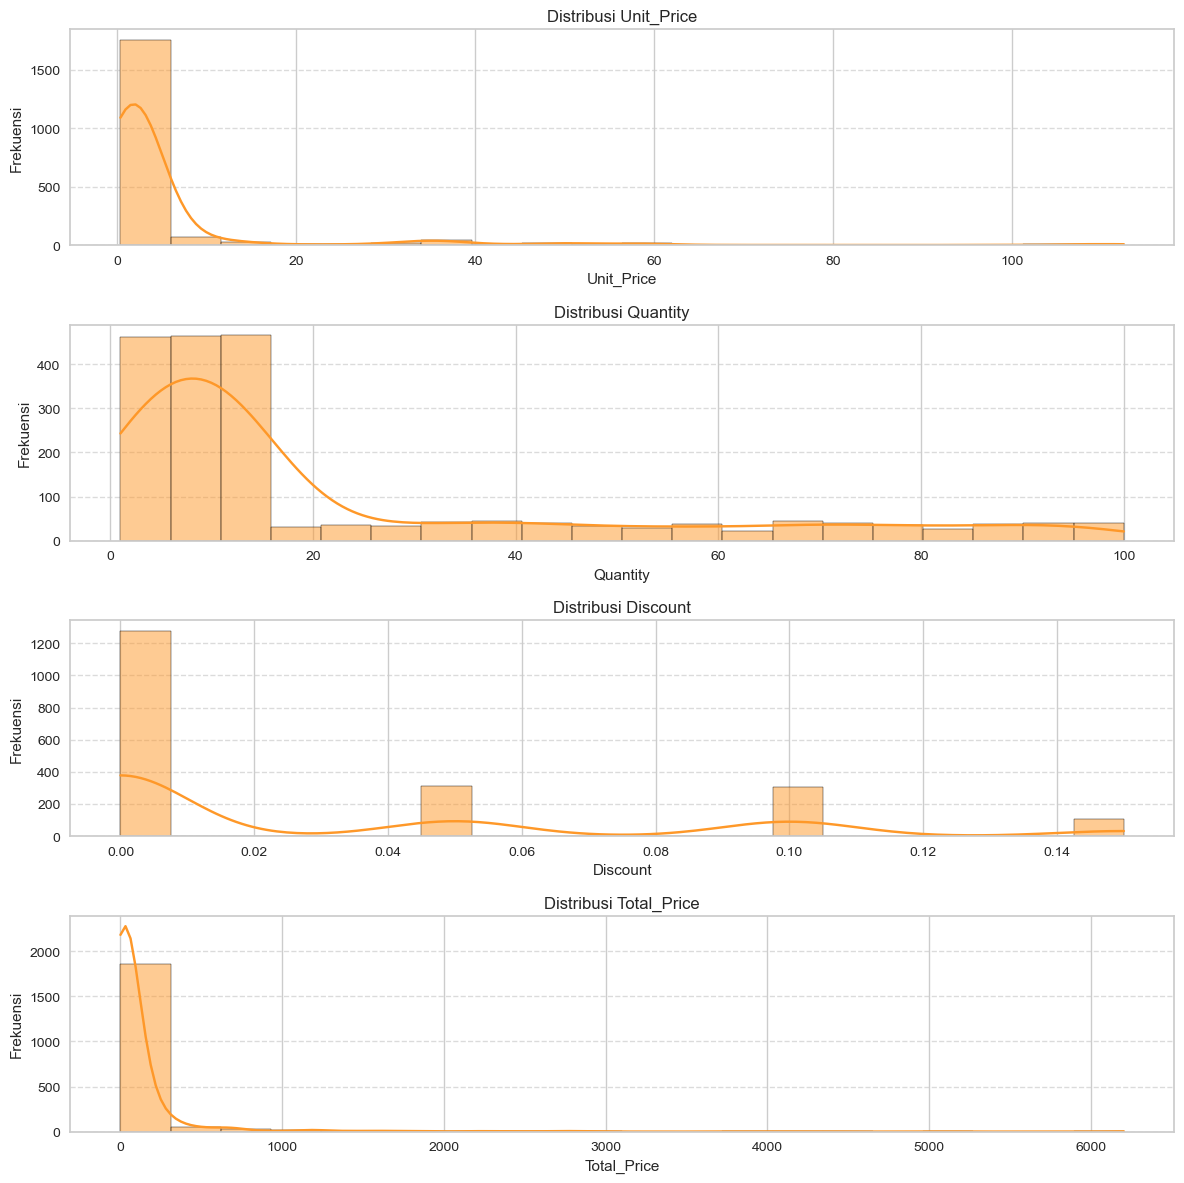

In [31]:
def plot_all_numerical_histograms(df):
    """
    Menampilkan histogram untuk semua fitur numerik dalam DataFrame.
    
    Parameters:
        df (DataFrame): DataFrame yang berisi data numerik.
    """
    # Custom palette
    custom_palette = sns.color_palette("YlOrBr", 3)  # Ambil 3 warna

    numeric_cols = df.select_dtypes(include=['number']).columns  # Memilih kolom numerik
    
    plt.figure(figsize=(12, len(numeric_cols) * 3))  # Menyesuaikan ukuran plot
    
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(len(numeric_cols), 1, i)
        sns.histplot(df[col], bins=20, kde=True, color=custom_palette[1])  # Histogram dengan KDE
        plt.title(f'Distribusi {col}')
        plt.xlabel(col)
        plt.ylabel('Frekuensi')
        plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

plot_all_numerical_histograms(df_sales)

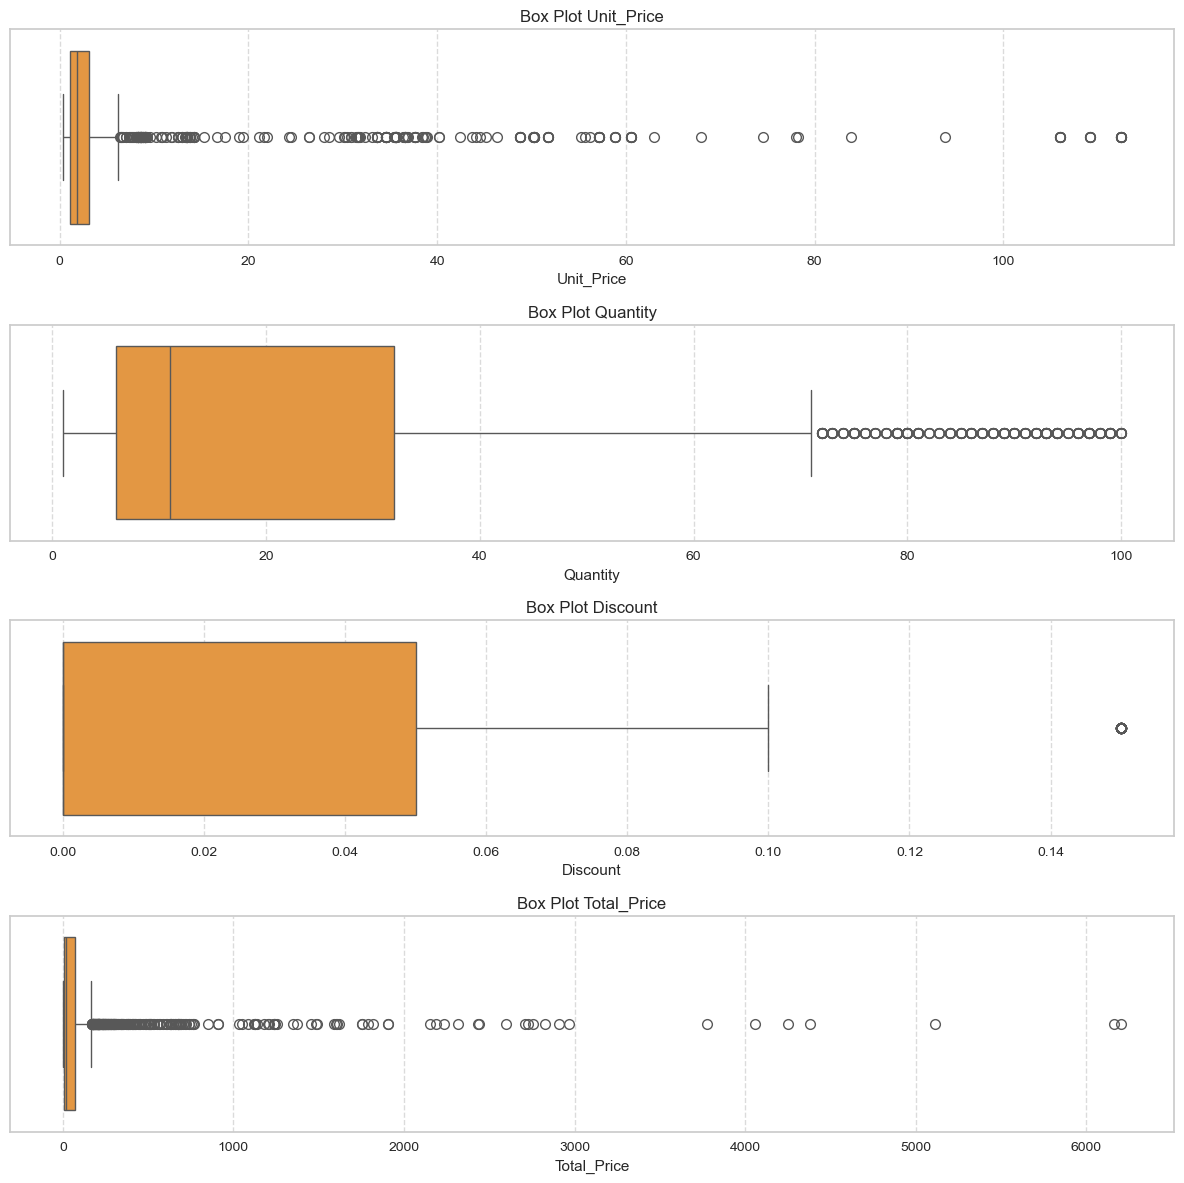

In [34]:
def plot_all_numerical_boxplots(df):
    """
    Menampilkan boxplot untuk semua fitur numerik dalam DataFrame.
    
    Parameters:
        df (DataFrame): DataFrame yang berisi data numerik.
    """
    # Custom palette
    custom_palette = sns.color_palette("YlOrBr", 3)  # Ambil 3 warna

    numeric_cols = df.select_dtypes(include=['number']).columns  # Memilih kolom numerik
    
    plt.figure(figsize=(12, len(numeric_cols) * 3))  # Menyesuaikan ukuran plot
    
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(len(numeric_cols), 1, i)
        sns.boxplot(x=df[col], color=custom_palette[1])  # Boxplot
        plt.title(f'Box Plot {col}')
        plt.xlabel(col)
        plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

plot_all_numerical_boxplots(df_sales)

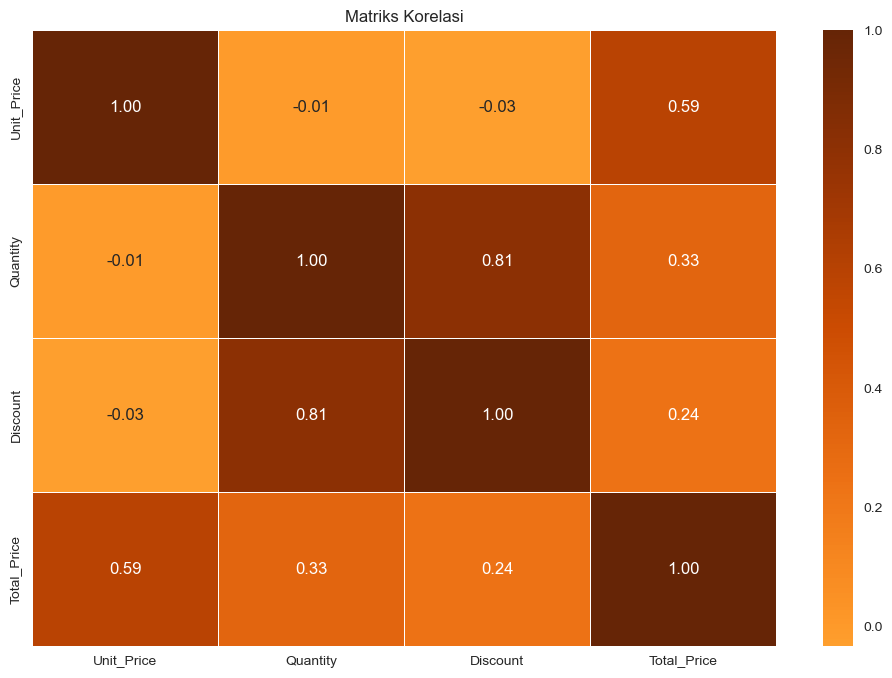

In [33]:
def plot_correlation_matrix(df):
    """
    Menampilkan matriks korelasi menggunakan heatmap.
    
    Parameters:
        df (DataFrame): DataFrame yang berisi data numerik.
    """
    numeric_cols = df.select_dtypes(include=['number'])  # Memilih kolom numerik
    correlation_matrix = numeric_cols.corr()  # Menghitung korelasi
    
    plt.figure(figsize=(12,8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="YlOrBr", linewidths=0.5, center=0)
    plt.title("Matriks Korelasi")
    plt.show()

plot_correlation_matrix(df_sales)

### **4.4. Visualisasi Data**

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values) (TIDAK ADA)
2. Menghapus Data Duplikat (TIDAK ADA)
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

---

In [ ]:
# Ambil subset dataset secara acak karena dataset terlalu besar
df_sales = df_sales.sample(n=2000, random_state=69, ignore_index=True)
df_sales.info()

### **5.1. Menghapus atau Menangani Data Kosong (Missing Values)**

In [12]:
print("Jumlah Data Kosong:", df_sales.isnull().sum().sum())

Jumlah Data Kosong: 0


### **5.2. Menghapus Data Duplikat**

In [ ]:
#  Cek data duplikat
print("Jumlah duplikat:", df_sales.duplicated().sum())

Jumlah duplikat: 0


### **5.3. Normalisasi atau Standarisasi**

In [ ]:
df_sales.head(1)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,7,0.0,7.28,Bremen,2021-02-17


In [ ]:
# Inisialisasi fungsi normalisasi dan standarisasi
min_max_scaler = MinMaxScaler() # normalisasi
standard_scaler = StandardScaler() # standarisasi
scaler_robust = RobustScaler()

In [ ]:
# Normalisasi data
df_normalized = df_sales.copy()
df_normalized[['Quantity']] = min_max_scaler.fit_transform(df_normalized[['Quantity']])
df_normalized.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,0.060606,0.00,7.28,Bremen,2021-02-17
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,0.454545,0.10,29.39,Sachsen-Anhalt,2023-04-15
2,ORD742327,CUS3123,B2B,Fritz-Kola,Soft Drinks,2.90,0.727273,0.05,201.11,Sachsen,2022-06-20
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,0.292929,0.05,76.38,Schleswig-Holstein,2021-09-07
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,0.020202,0.00,2.73,Hessen,2023-04-28


In [ ]:
# Standarisasi data
df_standardized = df_normalized.copy()
df_standardized[['Total_Price', 'Unit_Price']] = standard_scaler.fit_transform(df_standardized[['Total_Price', 'Unit_Price']])
df_standardized.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,-0.330879,0.060606,0.00,-0.278208,Bremen,2021-02-17
1,ORD1118443,CUS7797,B2B,Selters,Water,-0.354141,0.454545,0.10,-0.223536,Sachsen-Anhalt,2023-04-15
2,ORD742327,CUS3123,B2B,Fritz-Kola,Soft Drinks,-0.199763,0.727273,0.05,0.201079,Sachsen,2022-06-20
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,-0.215271,0.292929,0.05,-0.107343,Schleswig-Holstein,2021-09-07
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,-0.340043,0.020202,0.00,-0.289459,Hessen,2023-04-28


### **5.4. Deteksi dan Penanganan Outlier**

In [ ]:
# Ambil nama kolom data numerik dari DataFrame
numeric_columns = df_standardized.select_dtypes(include=['number']).columns

In [ ]:
# Menghitung Q1, Q3, dan IQR hanya untuk kolom numerik
Q1 = df_standardized[numeric_columns].quantile(0.25)
Q3 = df_standardized[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

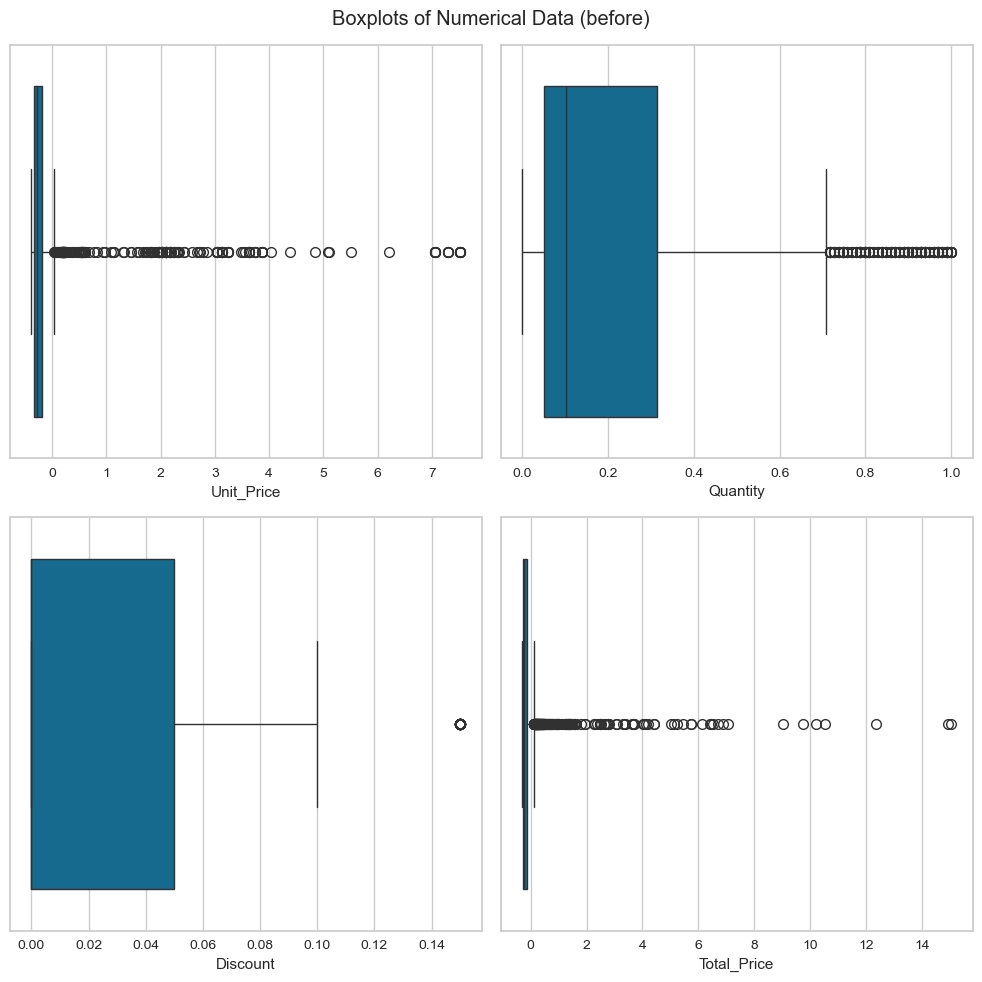

Jumlah data sebelum menghapus outlier: 2000


In [ ]:
# Menampilkan boxplot sebelum menghapus outlier
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df_standardized[col], ax=axes[i//2, i%2])
plt.suptitle("Boxplots of Numerical Data (before)")
plt.tight_layout()
plt.show()

print("Jumlah data sebelum menghapus outlier:", df_standardized.shape[0])
     

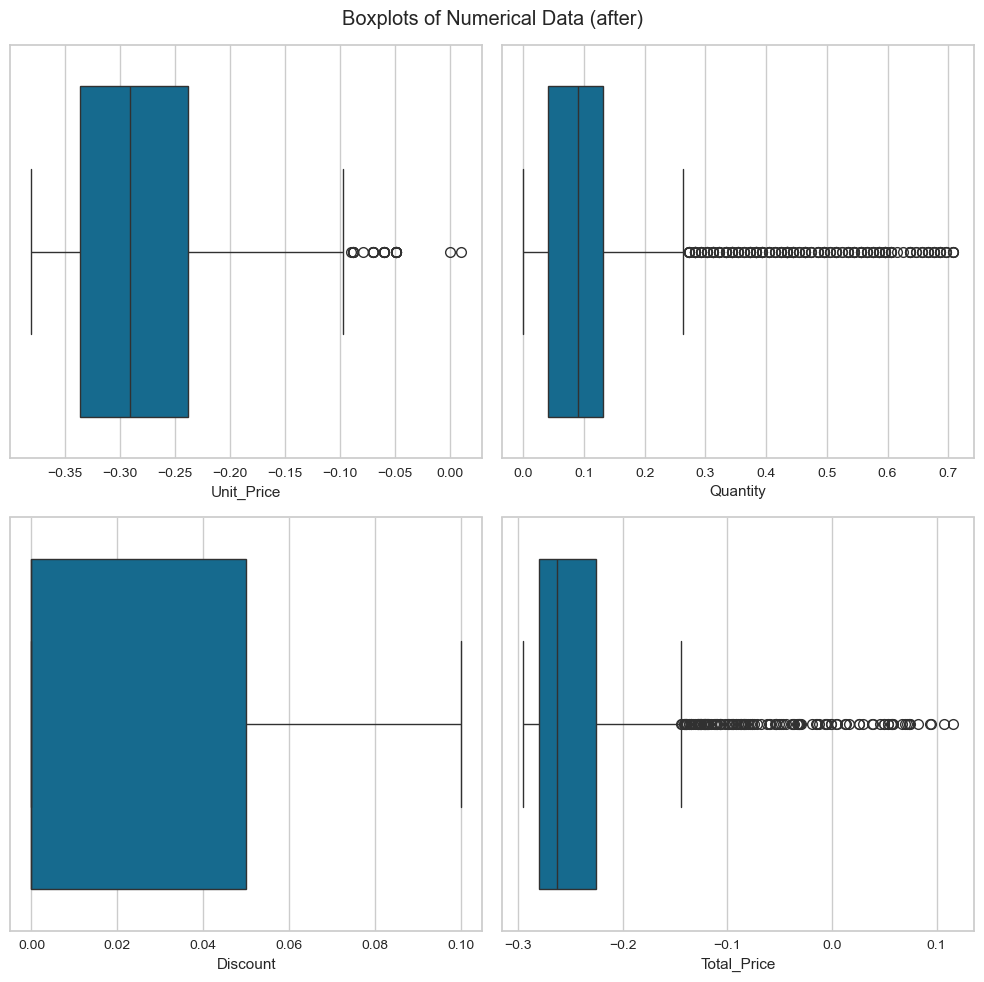

Jumlah data setelah menghapus outlier: 1515


In [ ]:
# Menghapus outlier pada kolom numerik
mask = ~((df_standardized[numeric_columns] < lower_bound) | (df_standardized[numeric_columns] > upper_bound)).any(axis=1)
df_cleaned = df_standardized[mask]

# Menampilkan boxplot sebelum menghapus outlier
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df_cleaned[col], ax=axes[i//2, i%2])
plt.suptitle("Boxplots of Numerical Data (after)")
plt.tight_layout()
plt.show()

print("Jumlah data setelah menghapus outlier:", df_cleaned.shape[0])

In [ ]:
df_cleaned.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,-0.330879,0.060606,0.00,-0.278208,Bremen,2021-02-17
1,ORD1118443,CUS7797,B2B,Selters,Water,-0.354141,0.454545,0.10,-0.223536,Sachsen-Anhalt,2023-04-15
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,-0.215271,0.292929,0.05,-0.107343,Schleswig-Holstein,2021-09-07
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,-0.340043,0.020202,0.00,-0.289459,Hessen,2023-04-28
5,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,-0.304797,0.030303,0.00,-0.282263,Bremen,2023-11-01


### **5.5. Encoding Data Kategorikal**

In [ ]:
# Inisialisasi label encoder
label_encoder = LabelEncoder()

df_labeled = df_cleaned.copy()

# Label encoding
df_labeled[['Customer_Type', 'Region', 'Product']] = df_cleaned[['Category', 'Region', 'Product']].apply(label_encoder.fit_transform)

# one-hot encoding
df_encoded = pd.get_dummies(df_labeled, columns=['Category'])
df_encoded.head()

,Order_ID,Customer_ID,Customer_Type,Product,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Category_Alcoholic Beverages,Category_Juices,Category_Soft Drinks,Category_Water
0,ORD697566,CUS6363,2,5,-0.330879,0.060606,0.00,-0.278208,4,2021-02-17,False,False,True,False
1,ORD1118443,CUS7797,3,31,-0.354141,0.454545,0.10,-0.223536,13,2023-04-15,False,False,False,True
3,ORD1437128,CUS6393,2,20,-0.215271,0.292929,0.05,-0.107343,14,2021-09-07,False,False,True,False
4,ORD562794,CUS4090,3,28,-0.340043,0.020202,0.00,-0.289459,6,2023-04-28,False,False,False,True
5,ORD2320519,CUS5936,0,2,-0.304797,0.030303,0.00,-0.282263,4,2023-11-01,True,False,False,False


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, kita akan membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Algoritma clustering yang sering digunakan sebagai berikut.
- `K-Means`: Cocok untuk dataset dengan batas klaster yang jelas dan ukuran klaster seragam.
- `DBSCAN`: Cocok untuk dataset dengan outlier atau klaster dengan bentuk yang tidak beraturan.
- `Hierarchical Clustering`: Berguna untuk memahami struktur hierarki antar data.

Disini, kita akan memulai dengan `K-Means` karena cocok untuk dataset transaksi yang memiliki pola berbasis jumlah transaksi dan durasi transaksi.

In [ ]:
# Tentukan fitur
features = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Category_Alcoholic Beverages', 'Category_Juices', 'Category_Soft Drinks', 'Category_Water']
X = df_encoded[features]
X

,Unit_Price,Quantity,Discount,Total_Price,Category_Alcoholic Beverages,Category_Juices,Category_Soft Drinks,Category_Water
0,-0.330879,0.060606,0.00,-0.278208,False,False,True,False
1,-0.354141,0.454545,0.10,-0.223536,False,False,False,True
3,-0.215271,0.292929,0.05,-0.107343,False,False,True,False
4,-0.340043,0.020202,0.00,-0.289459,False,False,False,True
5,-0.304797,0.030303,0.00,-0.282263,True,False,False,False
...,...,...,...,...,...,...,...,...
1990,-0.330174,0.080808,0.00,-0.272842,True,False,False,False
1992,-0.371060,0.070707,0.00,-0.286912,False,False,False,True
1994,-0.299157,0.020202,0.00,-0.285156,False,False,True,False
1996,-0.170861,0.111111,0.00,-0.197993,False,True,False,False


d:\Program_Files\Anaconda\envs\datascience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Program_Files\Anaconda\envs\datascience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Program_Files\Anaconda\envs\datascience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Program_Files\Anaconda\envs\datascience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default 

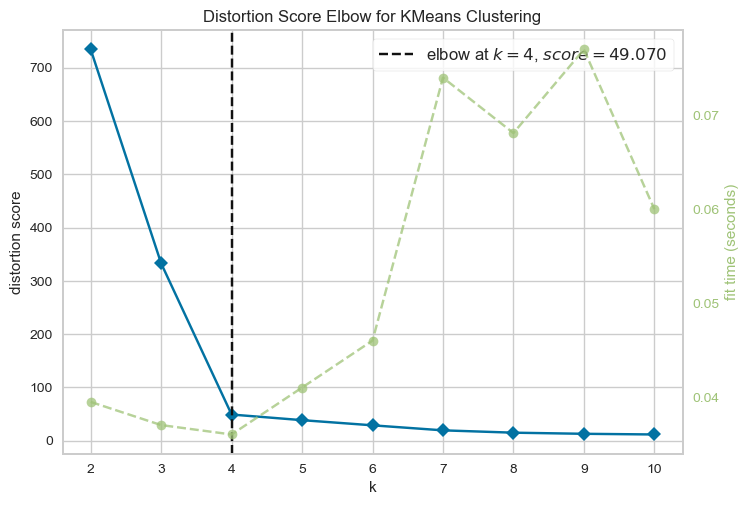

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(2, 11))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [ ]:
# Kurangi dimensi data menjadi 2 dengan PCA agar mudah untuk memvisualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
print(X_pca.shape)

(1515, 2)


In [ ]:
# Ambil k optimal dari Elbow method
optimal_k = visualizer.elbow_value_

# Fit data pada model k-means dengan k optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=69, init='k-means++')
kmeans.fit(X_pca)

d:\Program_Files\Anaconda\envs\datascience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=69)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
# Hitung Silhouette Score
silhouette_avg = silhouette_score(X_pca, kmeans.labels_)

print(f"Silhouette  for K={optimal_k}: {silhouette_avg:.4f}")

Silhouette  for K=4: 0.9927


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

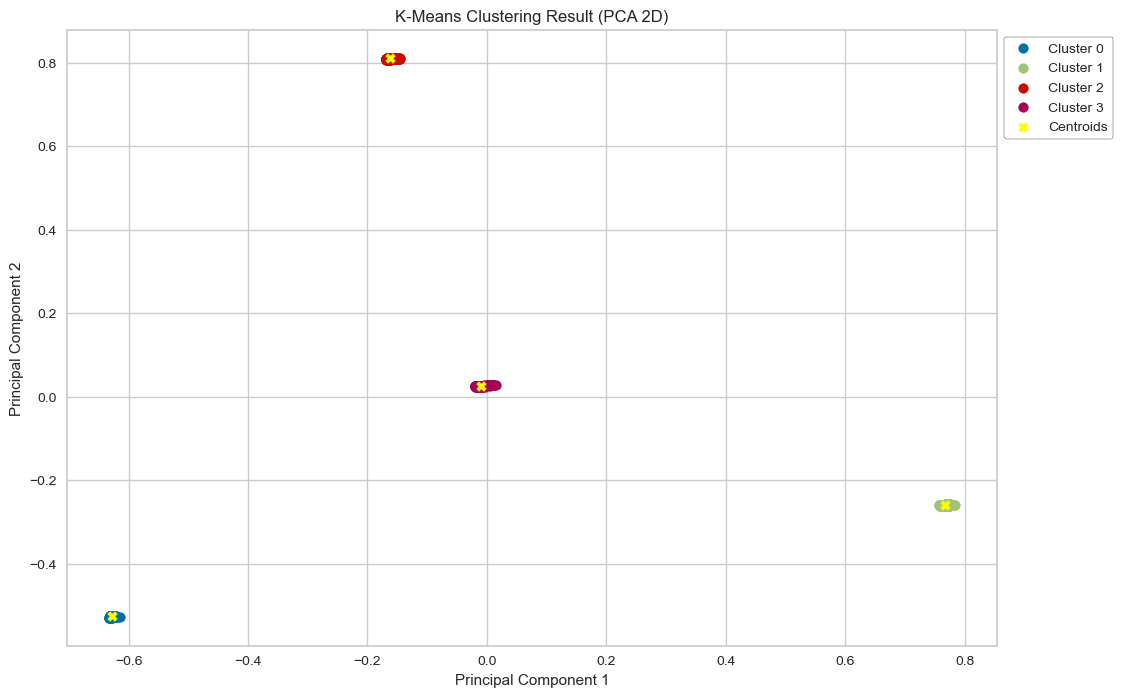

In [ ]:
# Visualize each cluster
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='yellow', marker='X', label='Centroids')
plt.title('K-Means Clustering Result (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, edgecolor='black')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

In [ ]:
df_labeled = df_cleaned.copy()
df_labeled['Cluster'] = kmeans.labels_
df_labeled.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,-0.330879,0.060606,0.00,-0.278208,Bremen,2021-02-17,2
1,ORD1118443,CUS7797,B2B,Selters,Water,-0.354141,0.454545,0.10,-0.223536,Sachsen-Anhalt,2023-04-15,0
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,-0.215271,0.292929,0.05,-0.107343,Schleswig-Holstein,2021-09-07,2
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,-0.340043,0.020202,0.00,-0.289459,Hessen,2023-04-28,0
5,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,-0.304797,0.030303,0.00,-0.282263,Bremen,2023-11-01,3


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi untuk mengembalikannya ke skala asli.

In [ ]:
# Ubah kembali data numerik menjadi semula (sebelum dinormalisasi/standardisasi)
df_labeled[['Quantity']] = min_max_scaler.inverse_transform(df_labeled[['Quantity']])
df_labeled[['Total_Price', 'Unit_Price']] = standard_scaler.inverse_transform(df_labeled[['Total_Price', 'Unit_Price']])
df_labeled.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen,2021-02-17,2
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt,2023-04-15,0
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein,2021-09-07,2
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen,2023-04-28,0
5,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen,2023-11-01,3


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Cluster
1    447
0    435
2    419
3    214
Name: count, dtype: int64 



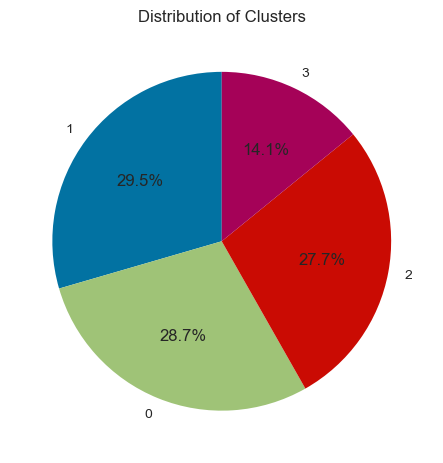

In [ ]:
# Hitung jumlah data per kluster
cluster_count = df_labeled['Cluster'].value_counts()
print(cluster_count,'\n')

# Visualisasi
plt.pie(cluster_count, labels=cluster_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Clusters')
plt.show()

In [ ]:
# Cari rata-rata setiap cluster
df_labeled.select_dtypes(include=['number']).groupby('Cluster').mean()

,Unit_Price,Quantity,Discount,Total_Price
Cluster,,,,
0,0.912161,15.181609,0.018966,12.722184
1,2.548680,14.266219,0.017450,33.223714
2,1.611647,14.202864,0.018377,21.718974
3,2.240093,13.883178,0.015187,28.336355


Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengekspor Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df_labeled.to_csv("Dataset_klasifikasi.csv", index=False)